## Fitbit Data Analysis

This notebook presents a comprehensive analysis of Fitbit activity data, sourced from a publicly available dataset on Kaggle (https://www.kaggle.com/datasets/arashnic/fitbit/data). My goal is to uncover insights into how different aspects of physical activity correlate with calorie expenditure. Through data exploration and statistical analysis, I address the following key questions:

1. Day-of-Week vs. Calorie Burn: How does calorie burn vary across different days of the week? This analysis seeks to understand if there are significant fluctuations in energy expenditure on weekdays compared to weekends, potentially revealing behavioral patterns or lifestyle choices that affect physical activity levels.

2. Activity Distance vs. Calories: What is the impact of the distance covered in various intensities of physical activities on the total calories burned? This question aims to identify which activities are the most efficient at burning calories, based on the distance covered.

3. Activity Duration vs. Calories: How does the duration of various types of physical activities correlate with calorie burn? By examining activities segmented into categories like light, moderate, and vigorous intensity, we aim to determine how the time spent on these activities influences overall calorie expenditure.

## Import Libraries and Data

In [3]:
import pandas as pd # for dataset usage
from datetime import datetime # for dates 
from pandas.api.types import CategoricalDtype # To sort by day of week
import seaborn as sns# For data visualization
import matplotlib.pyplot as plt # For data visualization
import numpy as np # For data editing
from scipy.stats import linregress # For linear regression values
import statsmodels.api as sm # For confidence intervals

In [4]:
dailyActivity = pd.read_csv('fitbit/dailyActivity_merged.csv') # Read the dataset

## Clean and reformat the data

In [5]:
dailyActivity # Print the dataset

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [6]:
dailyActivity = dailyActivity.drop_duplicates() # Remove duplicates and NA values
dailyActivity = dailyActivity.dropna()

In [7]:
# Make the date a datetime object
dailyActivity['ActivityDate'] = [datetime.strptime(day, '%m/%d/%Y').date() for day in dailyActivity['ActivityDate']]


In [8]:
# Create a column for the day of the week
dailyActivity['DayOfWeek'] = [day.strftime('%A') for day in dailyActivity['ActivityDate']]

## Analyze calories by day of week

In [9]:
meanByDay = dailyActivity[['TotalSteps', 'TotalDistance', 'Calories', 'DayOfWeek']].groupby('DayOfWeek').mean() # Get the mean values of TotalSteps, TotalDistance, and Calories by the day of week
daysInOrder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # The days of the week so we can order them
meanByDay.reset_index(inplace=True) # Make the day a column

In [10]:
dayType = CategoricalDtype(categories=daysInOrder, ordered=True)
meanByDay['DayOfWeek'] = meanByDay['DayOfWeek'].astype(dayType)
meanByDay = meanByDay.sort_values(by = ['DayOfWeek']).reset_index(drop=True)

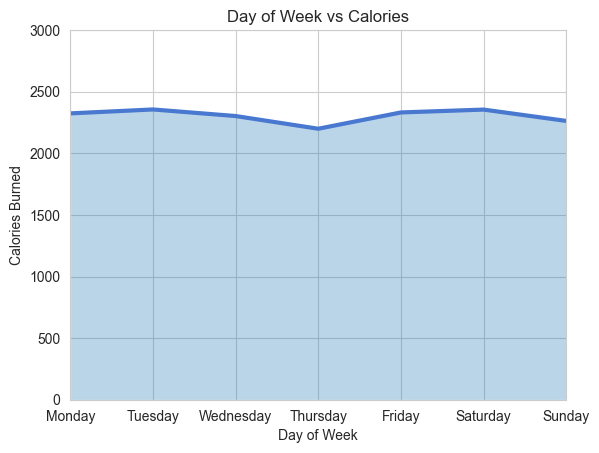

In [11]:

sns.set_style('whitegrid') # Set the style 
blue, = sns.color_palette("muted", 1)
x = meanByDay['DayOfWeek'] #  Set the x and y values
y = meanByDay['Calories']

fig, ax = plt.subplots() # Create the plot
ax.plot(x, y, color=blue, lw = 3)
ax.fill_between(x, 0, y, alpha=.3)
ax.set(xlim=(0, len(x) - 1), ylim=(0, 3000), xticks=x)
ax.set(xlabel = 'Day of Week', ylabel = 'Calories Burned', title = 'Day of Week vs Calories')
pass

We can see that there is a slight dip on Thursday, and Wednesday and Friday are also relatively low. Tuesday and Saturday seem to be the highest performing days

## Correlation between distance of different types and calories burned

In this section, I would like to analyze whether or not the type of distance (Very Active, Moderately Active, Lightly Active, Sedentary Active) is correlated with calories burned, or if only total distance matters

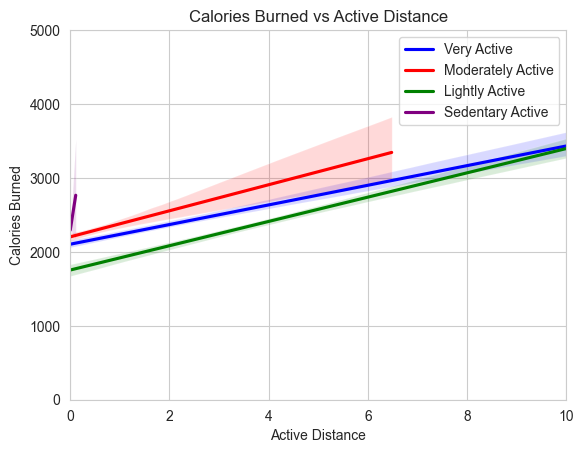

In [15]:

sns.set_style('whitegrid') # Set the style 
blue, = sns.color_palette("muted", 1)
x = dailyActivity['Calories'] #  Set the x and y values

fig, ax = plt.subplots() # Create the plot
sns.regplot(y='Calories', x='VeryActiveDistance', data=dailyActivity, color='blue', scatter=False, label='Very Active')
sns.regplot(y='Calories', x='ModeratelyActiveDistance', data=dailyActivity, color='red', scatter=False, label='Moderately Active')
sns.regplot(y='Calories', x='LightActiveDistance', data=dailyActivity, color='green', scatter=False, label='Lightly Active')
sns.regplot(y='Calories', x='SedentaryActiveDistance', data=dailyActivity, color='purple', scatter=False, label='Sedentary Active')

ax.set(xlim=(0, 10), ylim=(0, 5000))
ax.set(ylabel = 'Calories Burned', xlabel = 'Active Distance', title ='Calories Burned vs Active Distance')
ax.legend()
pass

In [16]:
categories = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']
dailyActivity[categories].describe() # Describe the dataset

,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
count,940.000000,940.000000,940.000000
mean,1.502681,0.567543,3.340819
std,2.658941,0.883580,2.040655
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.945000
50%,0.210000,0.240000,3.365000
75%,2.052500,0.800000,4.782500
max,21.920000,6.480000,10.710000


In [17]:


# Here, we will obtain the 95% confidence intervals for the slope of each distance. This should tell us, with 95% confidence,
# whether distance or type of activity matters more for burning calories
# SedentaryActiveDistance is not included due to its low sample size


X = sm.add_constant(dailyActivity[categories])  # Predictor variable
y = dailyActivity['Calories']  # Response variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the confidence interval for the fitted parameters
conf_int = model.conf_int(alpha=0.05)  # 95% CI
conf_int.columns = ['Lower Bound', 'Upper Bound']
conf_int



,Lower Bound,Upper Bound
const,1584.021207,1723.628397
VeryActiveDistance,100.259942,127.824722
ModeratelyActiveDistance,-7.632322,76.700433
LightActiveDistance,119.195123,155.477631


Outside of ModeratelyActiveDistance, LightActive and VeryActive have similar slopes. ModeratelyActive is likely low because people did not have high amounts of ModeratelyActiveDistance relative to the other types, so its data may be skewed. This supports the conclusion that distance matters more than type of activity for burning calories. 

## Comparing types of activity (minutes) with calories

In this section, we will do a similar analysis, but compare types of activity in minutes with calories

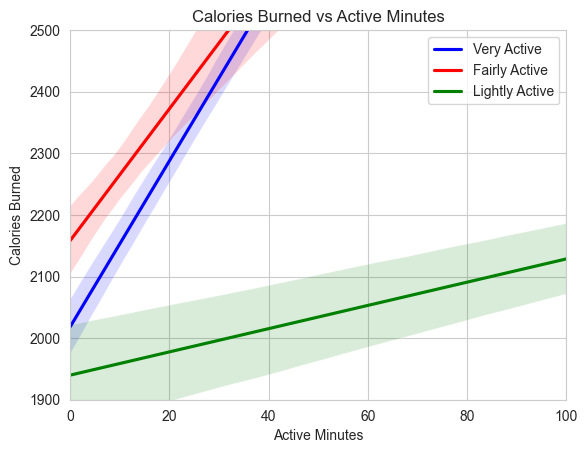

In [32]:

sns.set_style('whitegrid') # Set the style 
blue, = sns.color_palette("muted", 1)
x = dailyActivity['Calories'] #  Set the x and y values

fig, ax = plt.subplots() # Create the plot
sns.regplot(y='Calories', x='VeryActiveMinutes', data=dailyActivity, color='blue', scatter=False, label='Very Active')
sns.regplot(y='Calories', x='FairlyActiveMinutes', data=dailyActivity, color='red', scatter=False, label='Fairly Active')
sns.regplot(y='Calories', x='LightlyActiveMinutes', data=dailyActivity, color='green', scatter=False, label='Lightly Active')

ax.set(xlim=(0, 100), ylim=(1900, 2500))
ax.set(ylabel = 'Calories Burned', xlabel = 'Active Minutes', title ='Calories Burned vs Active Minutes')
ax.legend()
pass

In [24]:
categories = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']
dailyActivity[categories].describe() # Describe the dataset

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes
count,940.000000,940.000000,940.000000
mean,21.164894,13.564894,192.812766
std,32.844803,19.987404,109.174700
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,127.000000
50%,4.000000,6.000000,199.000000
75%,32.000000,19.000000,264.000000
max,210.000000,143.000000,518.000000


In [45]:


# Here, we will obtain the 95% confidence intervals for the slope of each type of activity in terms of minutes. This should tell us, with 95% confidence,
# whether minutes or type of activity matters more for burning calories
# SedentaryMinutes is not included 


X = sm.add_constant(dailyActivity[categories])  # Predictor variable
y = dailyActivity['Calories']  # Response variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the confidence interval for the fitted parameters
conf_int = model.conf_int(alpha=0.05)  # 95% CI
conf_int.columns = ['Lower Bound', 'Upper Bound']
conf_int



,Lower Bound,Upper Bound
const,1614.057242,1758.887175
VeryActiveMinutes,11.541894,13.731774
FairlyActiveMinutes,1.080648,4.714837
LightlyActiveMinutes,1.293266,1.926153


It seems fairly clear that very active minutes burn a lot of calories but fairly/lightly active minutes burn a similar amount of calories. One possible explanation for this is that the activites for fairly/lightly minutes may be similar (e.g. jogging or swimming) but the activities for very active minutes would be taken to another level (e.g. sprinting). That being said, FairlyActiveMinutes does have a much higher upper bound than LightlyActiveMinutes, so it may be good to check the probability that FairlyActiveMinutes has a higher value than LightlyActiveMinutes in terms of calories burned/minute

To check this, we can run a bootstrap simulation 

In [57]:


# Function to bootstrap and compare coefficients
def bootstrap_compare_coeffs(data, predictors, response, n_bootstrap=10000):
    count = 0
    n = len(data) # Set n to the length of the original dataset
    
    for i in range(n_bootstrap):
        # Sample with replacement
        sample = data.sample(n, replace=True)
        
        # Fit model
        X = sm.add_constant(sample[predictors])
        y = sample[response]
        model = sm.OLS(y, X).fit()
        
        # Compare coefficients
        if model.params[predictors[0]] > model.params[predictors[1]]:
            count += 1
        
       
    # Estimate probability
    probability = count / n_bootstrap
    return probability


data = dailyActivity  # Set the dataset
predictors = ['FairlyActiveMinutes', 'LightlyActiveMinutes']  # Variables to compare
response = 'Calories'  # Response variable
n_bootstrap = 10000  # Number of bootstrap samples

probability = bootstrap_compare_coeffs(data, predictors, response, n_bootstrap)
print(f"Probability that the coefficient of {predictors[0]} is greater than {predictors[1]}: {probability}")


Probability that the coefficient of FairlyActiveMinutes is greater than LightlyActiveMinutes: 1.0


As we can see from the bootstrap sampling, it is evident that FairlyActiveMinutes will generally burn more calories than LightlyActiveMinutes. The parametersbelow show you the calories/minute burned for each type of activity

In [58]:
model.params

const                   1686.472209
VeryActiveMinutes         12.636834
FairlyActiveMinutes        2.897742
LightlyActiveMinutes       1.609710
dtype: float64